<a href="https://colab.research.google.com/github/gopaps/MachineLearning/blob/main/week/week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification model: Decision Tree dan k-NN
CreditDataset.csv


In [210]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [197]:
!pip install mglearn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 17.8 MB/s eta 0:00:00


In [198]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz
import mglearn

In [199]:
# Load dataset dari Google Drive
# Sesuaikan path file dataset dengan lokasi yang ada di Google Drive Anda
credit_data = '/content/drive/My Drive/dataset/CreditDataset.csv'

In [200]:
# Mount Google Drive agar dapat mengakses file
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
# Membaca dataset menggunakan pandas
credit_data  = pd.read_csv(credit_data)

In [202]:

# Langkah 1: Encoding fitur kategori
# Dataset memiliki banyak data kategori. Kita harus mengubahnya menjadi data numerik
le = LabelEncoder()

# Menerapkan label encoding untuk setiap kolom kategori
for col in credit_data.columns:
    if credit_data[col].dtype == 'object':
        credit_data[col] = le.fit_transform(credit_data[col])

# Memisahkan fitur dan target
X = credit_data.drop('Class', axis=1)  # Fitur
y = credit_data['Class']  # Target

# Memisahkan data untuk latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
# Melatih model Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Prediksi dengan model Decision Tree
y_pred_tree = tree_clf.predict(X_test)

# Menampilkan evaluasi model
print(f"Akurasi Decision Tree: {metrics.accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Presisi Decision Tree: {metrics.precision_score(y_test, y_pred_tree, average='macro'):.2f}")
print(f"Recall Decision Tree: {metrics.recall_score(y_test, y_pred_tree, average='macro'):.2f}")
print(f"F1 Score Decision Tree: {metrics.f1_score(y_test, y_pred_tree, average='macro'):.2f}")

# Visualisasi Tree dengan Graphviz
dot_data = export_graphviz(tree_clf, out_file=None, feature_names=X.columns, class_names=['1', '2'], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_graph")
graph.view()


Akurasi Decision Tree: 0.67
Presisi Decision Tree: 0.60
Recall Decision Tree: 0.59
F1 Score Decision Tree: 0.60


'decision_tree_graph.pdf'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


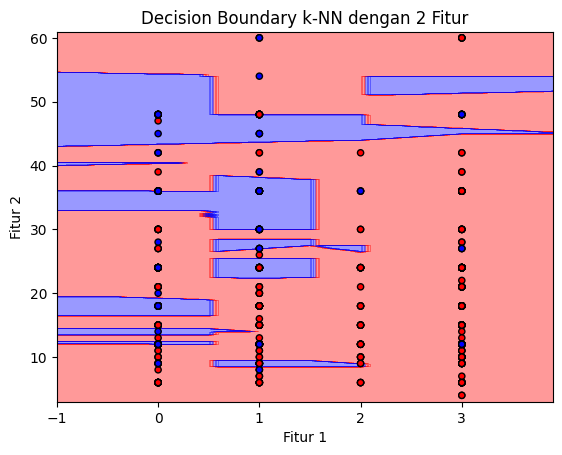

In [205]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Pilih dua fitur pertama untuk visualisasi
X_vis = X_train.iloc[:, :2]  # Menggunakan dua fitur pertama untuk visualisasi
y_vis = y_train

# Melatih model k-NN dengan dua fitur saja untuk visualisasi
knn_clf_vis = KNeighborsClassifier(n_neighbors=5)
knn_clf_vis.fit(X_vis, y_vis)

# Membuat grid untuk visualisasi
x_min, x_max = X_vis.iloc[:, 0].min() - 1, X_vis.iloc[:, 0].max() + 1
y_min, y_max = X_vis.iloc[:, 1].min() - 1, X_vis.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Prediksi untuk setiap titik di grid
Z = knn_clf_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))
plt.scatter(X_vis.iloc[:, 0], X_vis.iloc[:, 1], c=y_vis, s=20, edgecolor='k', cmap=ListedColormap(('red', 'blue')))
plt.title("Decision Boundary k-NN dengan 2 Fitur")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()


Evaluasi Model k-NN:
Akurasi k-NN: 0.66
Presisi k-NN: 0.56
Recall k-NN: 0.55
F1 Score k-NN: 0.54
AUC k-NN: 0.56


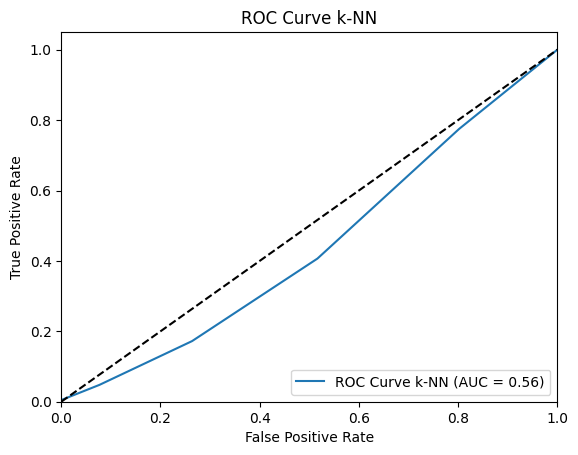


Evaluasi Model Decision Tree:
Akurasi Decision Tree: 0.67
Presisi Decision Tree: 0.60
Recall Decision Tree: 0.59
F1 Score Decision Tree: 0.60
AUC Decision Tree: 0.59


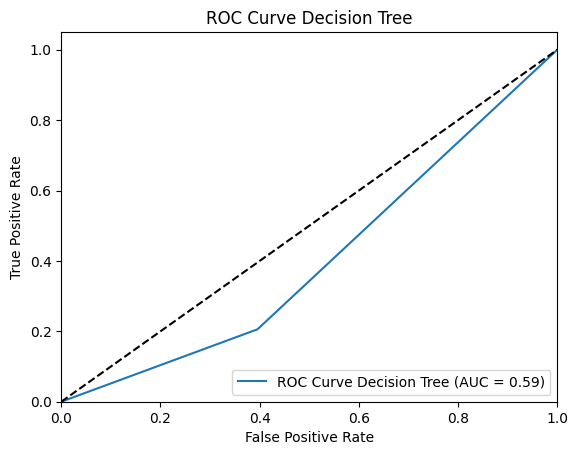

In [206]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Encoding fitur kategori
le = LabelEncoder()

# Menerapkan label encoding untuk setiap kolom kategori
for col in credit_data.columns:
    if credit_data[col].dtype == 'object':
        credit_data[col] = le.fit_transform(credit_data[col])

# Memisahkan fitur dan target
X = credit_data.drop('Class', axis=1)  # Fitur
y = credit_data['Class']  # Target

# Memisahkan data untuk latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model k-NN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Prediksi dengan model k-NN
y_pred_knn = knn_clf.predict(X_test)

# Melatih model Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Prediksi dengan model Decision Tree
y_pred_tree = tree_clf.predict(X_test)

# Menghitung metrik evaluasi untuk k-NN
print("Evaluasi Model k-NN:")
print(f"Akurasi k-NN: {accuracy_score(y_test, y_pred_knn):.2f}")
print(f"Presisi k-NN: {precision_score(y_test, y_pred_knn, average='macro'):.2f}")
print(f"Recall k-NN: {recall_score(y_test, y_pred_knn, average='macro'):.2f}")
print(f"F1 Score k-NN: {f1_score(y_test, y_pred_knn, average='macro'):.2f}")

# Menghitung AUC dan menggambar ROC untuk k-NN (membutuhkan prediksi probabilitas)
y_prob_knn = knn_clf.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn, pos_label=1)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)
print(f"AUC k-NN: {roc_auc_knn:.2f}")

# Plot ROC Curve untuk k-NN
plt.figure()
plt.plot(fpr_knn, tpr_knn, label=f'ROC Curve k-NN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve k-NN')
plt.legend(loc='lower right')
plt.show()

# Menghitung metrik evaluasi untuk Decision Tree
print("\nEvaluasi Model Decision Tree:")
print(f"Akurasi Decision Tree: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Presisi Decision Tree: {precision_score(y_test, y_pred_tree, average='macro'):.2f}")
print(f"Recall Decision Tree: {recall_score(y_test, y_pred_tree, average='macro'):.2f}")
print(f"F1 Score Decision Tree: {f1_score(y_test, y_pred_tree, average='macro'):.2f}")

# Menghitung AUC dan menggambar ROC untuk Decision Tree (membutuhkan prediksi probabilitas)
y_prob_tree = tree_clf.predict_proba(X_test)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree, pos_label=1)
roc_auc_tree = roc_auc_score(y_test, y_prob_tree)
print(f"AUC Decision Tree: {roc_auc_tree:.2f}")

# Plot ROC Curve untuk Decision Tree
plt.figure()
plt.plot(fpr_tree, tpr_tree, label=f'ROC Curve Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Garis diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.legend(loc='lower right')
plt.show()


Akurasi Decision Tree: 0.67
Presisi Decision Tree: 0.60
Recall Decision Tree: 0.59
F1 Score Decision Tree: 0.60


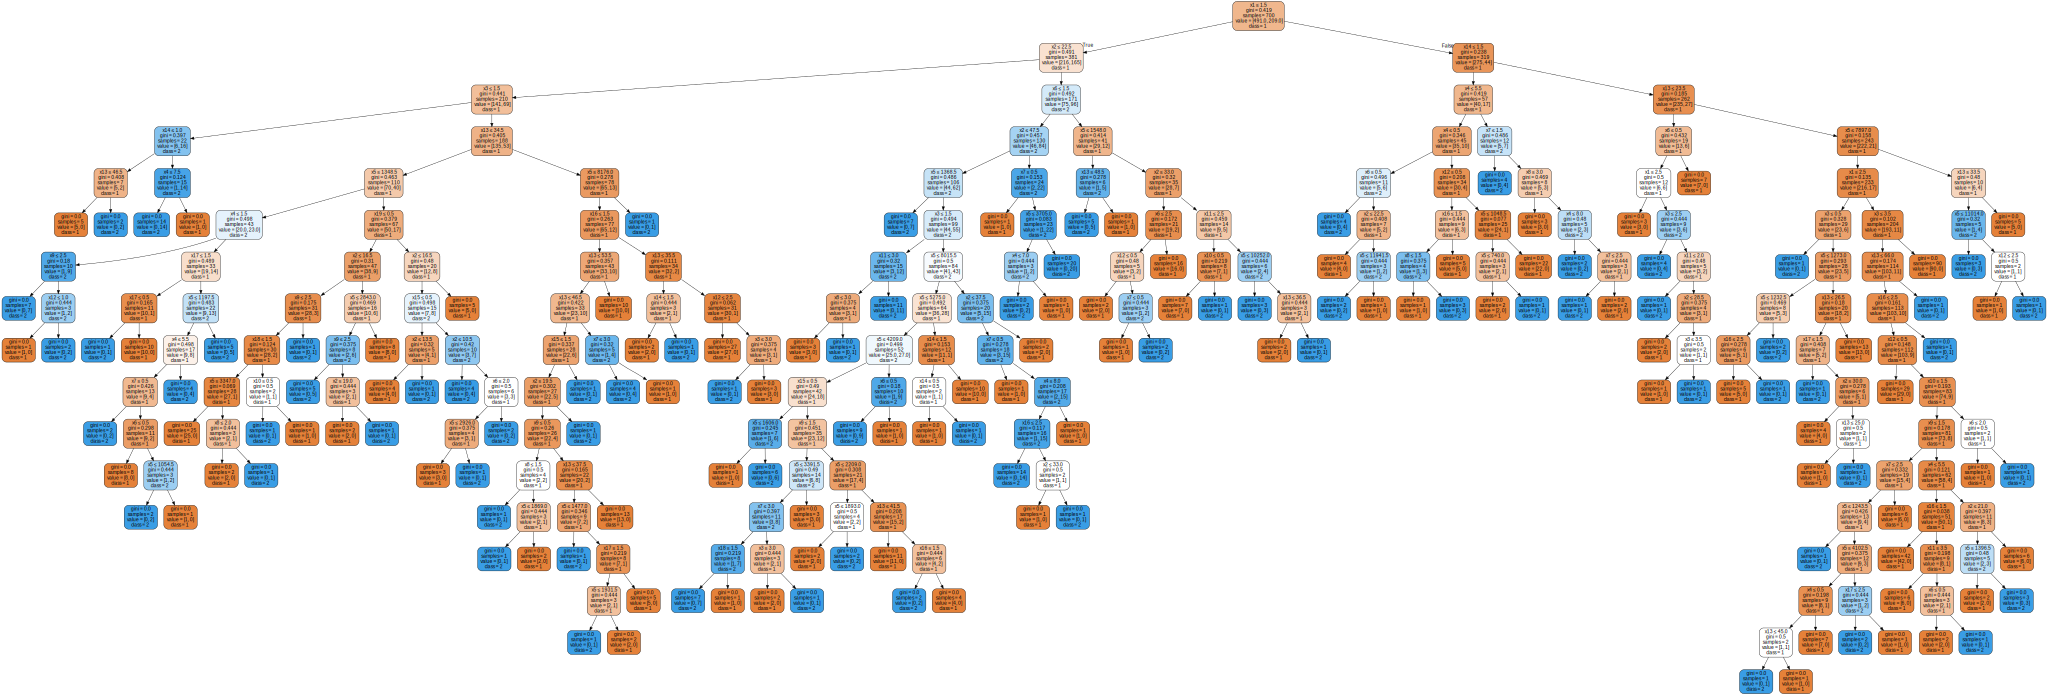

In [214]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import export_graphviz
import graphviz

# Encoding fitur kategori
le = LabelEncoder()

# Menerapkan label encoding untuk setiap kolom kategori
for col in credit_data.columns:
    if credit_data[col].dtype == 'object':
        credit_data[col] = le.fit_transform(credit_data[col])

# Memisahkan fitur dan target
X = credit_data.drop('Class', axis=1)  # Fitur
y = credit_data['Class']  # Target

# Memisahkan data untuk latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Melatih model Decision Tree
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Prediksi dengan model Decision Tree
y_pred_tree = tree_clf.predict(X_test)

# Menampilkan evaluasi model
print(f"Akurasi Decision Tree: {accuracy_score(y_test, y_pred_tree):.2f}")
print(f"Presisi Decision Tree: {precision_score(y_test, y_pred_tree, average='macro'):.2f}")
print(f"Recall Decision Tree: {recall_score(y_test, y_pred_tree, average='macro'):.2f}")
print(f"F1 Score Decision Tree: {f1_score(y_test, y_pred_tree, average='macro'):.2f}")

# Visualisasi Tree dengan Graphviz langsung di output
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['1', '2'],  # Sesuaikan dengan label target
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph  # Ini akan menampilkan decision tree langsung di output


# Regression model: Decision Tree  dan k-NN
MaterialStrength.csv

In [233]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [234]:
# Import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

from google.colab import drive


In [235]:
# Load dataset dari Google Drive
# Sesuaikan path file dataset dengan lokasi yang ada di Google Drive Anda
material_data = '/content/drive/My Drive/dataset/MaterialStrength.csv'

In [236]:
# Mount Google Drive agar dapat mengakses file
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [237]:
# Membaca dataset menggunakan pandas
material_data  = pd.read_csv(material_data)

In [238]:
# Encoding fitur kategori
le = LabelEncoder()

# Menerapkan label encoding untuk kolom kategori yang ada
for col in material_data.columns:
    if material_data[col].dtype == 'object':
        material_data[col] = le.fit_transform(material_data[col])

# Memisahkan fitur dan target
X = material_data.drop('target_feature', axis=1)  # Fitur
y = material_data['target_feature']  # Target

# Memisahkan data untuk latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Regresi Decision Tree
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Prediksi dengan Decision Tree
y_pred_tree = tree_reg.predict(X_test)

# Visualisasi Tree dengan Graphviz langsung
dot_data = export_graphviz(tree_reg, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph  # Menampilkan decision tree secara langsung

# Menghitung metrik evaluasi untuk Decision Tree
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"MSE Decision Tree: {mse_tree:.2f}")
print(f"RMSE Decision Tree: {rmse_tree:.2f}")
print(f"R-squared Decision Tree: {r2_tree:.2f}")

MSE Decision Tree: 19.68
RMSE Decision Tree: 4.44
R-squared Decision Tree: 0.93



MSE k-NN: 91.62
RMSE k-NN: 9.57
R-squared k-NN: 0.66


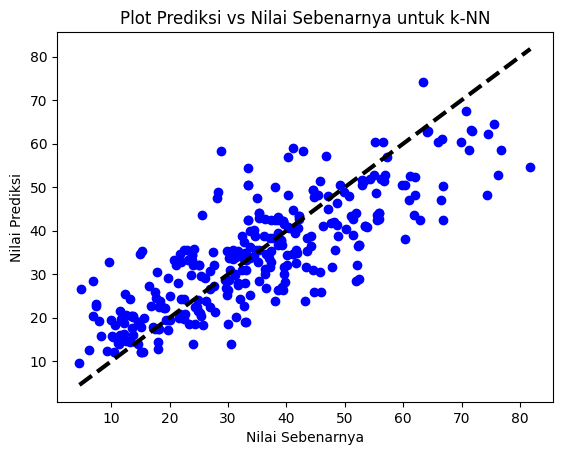

In [239]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Model Regresi k-NN
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Prediksi dengan k-NN
y_pred_knn = knn_reg.predict(X_test)

# Menghitung metrik evaluasi untuk k-NN
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"\nMSE k-NN: {mse_knn:.2f}")
print(f"RMSE k-NN: {rmse_knn:.2f}")
print(f"R-squared k-NN: {r2_knn:.2f}")

# Visualisasi Prediksi vs Nilai Sebenarnya untuk k-NN
plt.scatter(y_test, y_pred_knn, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Nilai Prediksi")
plt.title("Plot Prediksi vs Nilai Sebenarnya untuk k-NN")
plt.show()


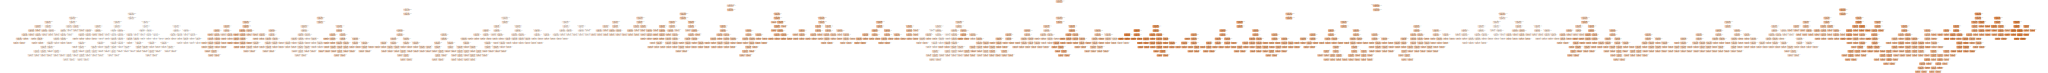

In [240]:
# Displaying the decision tree visualization directly
import graphviz
from sklearn.tree import export_graphviz

# Generate the dot data for the Decision Tree visualization
dot_data = export_graphviz(tree_reg, out_file=None,
                           feature_names=X.columns,
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph  # Display the decision tree directly


MSE Linear Regression: 87.77
RMSE Linear Regression: 9.37
R-squared Linear Regression: 0.68

MSE Polynomial Regression: 41.54
RMSE Polynomial Regression: 6.45
R-squared Polynomial Regression: 0.85


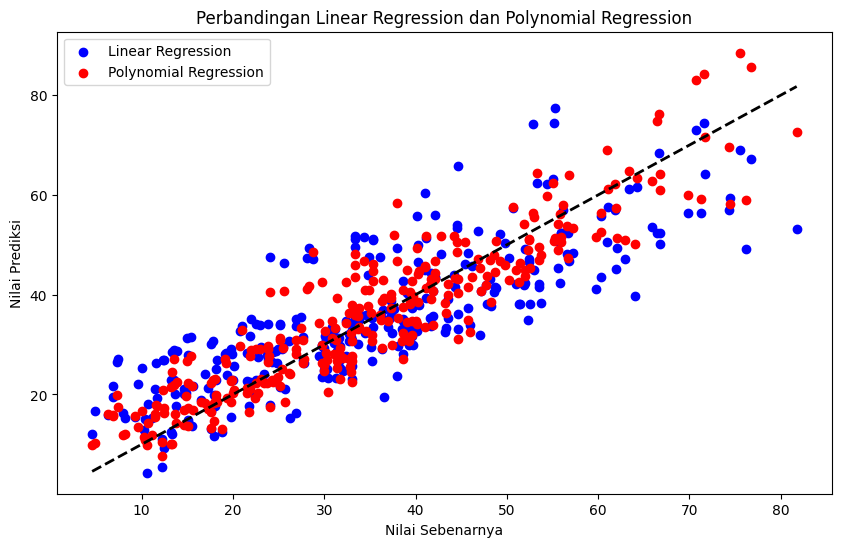

In [241]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Encoding fitur kategori
from sklearn.preprocessing import LabelEncoder

# Menerapkan label encoding untuk kolom kategori yang ada
for col in material_data.columns:
    if material_data[col].dtype == 'object':
        material_data[col] = LabelEncoder().fit_transform(material_data[col])

# Memisahkan fitur dan target
X = material_data.drop('target_feature', axis=1)  # Fitur
y = material_data['target_feature']  # Target

# Memisahkan data untuk latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 1. Model Regresi Linear Biasa ###
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Prediksi dengan Regresi Linear Biasa
y_pred_linear = linear_reg.predict(X_test)

# Evaluasi model Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Menampilkan hasil evaluasi
print(f"MSE Linear Regression: {mse_linear:.2f}")
print(f"RMSE Linear Regression: {rmse_linear:.2f}")
print(f"R-squared Linear Regression: {r2_linear:.2f}")

### 2. Model Regresi dengan Basis Fungsi (Polynomial Regression) ###
poly = PolynomialFeatures(degree=2)  # Menggunakan derajat polinomial ke-2
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Model Regresi dengan Basis Fungsi
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Prediksi dengan Model Polynomial
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluasi model Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Menampilkan hasil evaluasi
print(f"\nMSE Polynomial Regression: {mse_poly:.2f}")
print(f"RMSE Polynomial Regression: {rmse_poly:.2f}")
print(f"R-squared Polynomial Regression: {r2_poly:.2f}")

### 3. Visualisasi Hasil ###
plt.figure(figsize=(10, 6))

# Plot untuk Linear Regression
plt.scatter(y_test, y_pred_linear, color='blue', label='Linear Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

# Plot untuk Polynomial Regression
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Regression')

plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Perbandingan Linear Regression dan Polynomial Regression')
plt.legend()
plt.show()
